In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
plt.rc('font', family='Malgun Gothic') # 폰트 지정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [5]:
import warnings
warnings.filterwarnings('ignore')

-----------------------

# 1. 데이터 불러오기

In [6]:
df = pd.read_csv('./dataset/ks200.csv', index_col="날짜")
df

,레이블,WTI,환율,VIX,PER,PBR,통화량,기준금리,소비자물가지수,수입금액지수,수출금액지수,경제심리지수,경기종합지수,실업률,고용률,한국경제성장률,미국경제성장률
날짜,,,,,,,,,,,,,,,,,
2011-04-01,down,107.94,1099.20,17.40,18.73,1.66,1686110.4,3.0,89.325,123.11,105.20,109.5,100.8,3.5,59.3,0.5,0.7
2011-04-04,down,108.47,1085.20,17.50,18.68,1.65,1686110.4,3.0,89.325,123.11,105.20,109.5,100.8,3.5,59.3,0.5,0.7
2011-04-05,down,108.34,1086.50,17.25,18.82,1.66,1686110.4,3.0,89.325,123.11,105.20,109.5,100.8,3.5,59.3,0.5,0.7
2011-04-06,down,108.83,1087.20,16.90,18.78,1.66,1686110.4,3.0,89.325,123.11,105.20,109.5,100.8,3.5,59.3,0.5,0.7
2011-04-07,neutral,110.30,1083.30,17.11,18.74,1.66,1686110.4,3.0,89.325,123.11,105.20,109.5,100.8,3.5,59.3,0.5,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,down,69.37,1307.67,14.25,13.89,0.93,3795008.4,3.5,111.120,147.33,126.86,92.9,98.9,2.6,62.7,0.6,0.5
2023-06-27,down,67.70,1302.66,13.74,13.89,0.93,3795008.4,3.5,111.120,147.33,126.86,92.9,98.9,2.6,62.7,0.6,0.5
2023-06-28,down,69.56,1296.60,13.43,13.81,0.92,3795008.4,3.5,111.120,147.33,126.86,92.9,98.9,2.6,62.7,0.6,0.5


------------------------

# 2. 데이터 전처리

## EDA

- 데이터 정보 확인

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 2011-04-01 to 2023-06-30
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   레이블      2923 non-null   object 
 1   WTI      2923 non-null   float64
 2   환율       2923 non-null   float64
 3   VIX      2923 non-null   float64
 4   PER      2923 non-null   float64
 5   PBR      2923 non-null   float64
 6   통화량      2923 non-null   float64
 7   기준금리     2923 non-null   float64
 8   소비자물가지수  2923 non-null   float64
 9   수입금액지수   2923 non-null   float64
 10  수출금액지수   2923 non-null   float64
 11  경제심리지수   2923 non-null   float64
 12  경기종합지수   2923 non-null   float64
 13  실업률      2923 non-null   float64
 14  고용률      2923 non-null   float64
 15  한국경제성장률  2923 non-null   float64
 16  미국경제성장률  2923 non-null   float64
dtypes: float64(16), object(1)
memory usage: 411.0+ KB


## 결측치 제거

- 결측치 제거(공휴일)
- PER 결측치 0으로 대체

In [8]:
# 코드 생략

- 결측치 제거 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 2011-04-01 to 2023-06-30
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   레이블      2923 non-null   object 
 1   WTI      2923 non-null   float64
 2   환율       2923 non-null   float64
 3   VIX      2923 non-null   float64
 4   PER      2923 non-null   float64
 5   PBR      2923 non-null   float64
 6   통화량      2923 non-null   float64
 7   기준금리     2923 non-null   float64
 8   소비자물가지수  2923 non-null   float64
 9   수입금액지수   2923 non-null   float64
 10  수출금액지수   2923 non-null   float64
 11  경제심리지수   2923 non-null   float64
 12  경기종합지수   2923 non-null   float64
 13  실업률      2923 non-null   float64
 14  고용률      2923 non-null   float64
 15  한국경제성장률  2923 non-null   float64
 16  미국경제성장률  2923 non-null   float64
dtypes: float64(16), object(1)
memory usage: 411.0+ KB


## 기초통계량 확인

- 상대적으로 값이 큰(평균이 1000이 넘는) 피쳐는 로그 변환 실시가 필요함

In [10]:
df.describe()

,WTI,환율,VIX,PER,PBR,통화량,기준금리,소비자물가지수,수입금액지수,수출금액지수,경제심리지수,경기종합지수,실업률,고용률,한국경제성장률,미국경제성장률
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2.923000e+03,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,70.292234,1145.867992,18.389918,13.568505,1.116610,2.573846e+06,1.874530,97.865304,122.195344,111.209158,96.880123,99.900582,3.488060,60.565686,0.636538,0.546664
std,22.973239,73.936037,7.328396,4.292416,0.158836,6.590694e+05,0.884751,5.310082,21.362025,13.608720,6.633181,0.852485,0.422564,0.832627,0.770285,1.748614
min,-37.630000,999.830000,9.140000,8.090000,0.630000,1.686110e+06,0.500000,89.325000,80.490000,81.830000,73.600000,98.000000,2.500000,58.800000,-3.000000,-8.500000
25%,50.790000,1098.730000,13.430000,11.060000,1.000000,1.973452e+06,1.250000,94.015000,108.070000,103.820000,94.500000,99.400000,3.200000,60.000000,0.500000,0.300000
50%,67.390000,1131.200000,16.410000,12.700000,1.130000,2.459313e+06,1.500000,97.499000,120.260000,107.920000,97.400000,99.900000,3.500000,60.600000,0.700000,0.600000
75%,92.805000,1180.685000,21.215000,14.250000,1.210000,3.071790e+06,2.500000,100.090000,125.860000,119.900000,100.000000,100.500000,3.800000,60.850000,0.900000,0.800000
max,123.700000,1443.960000,82.690000,30.520000,1.730000,3.819492e+06,3.500000,111.130000,184.160000,154.040000,109.500000,102.200000,4.800000,62.800000,2.300000,7.900000


##  로그 변환

In [11]:
# 통화량, 환율 로그 변환
feature_to_log_transform = ['통화량', '환율']
df[feature_to_log_transform] = np.log(df[feature_to_log_transform])

In [12]:
df.describe()

,WTI,환율,VIX,PER,PBR,통화량,기준금리,소비자물가지수,수입금액지수,수출금액지수,경제심리지수,경기종합지수,실업률,고용률,한국경제성장률,미국경제성장률
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,70.292234,7.041923,18.389918,13.568505,1.116610,14.728971,1.874530,97.865304,122.195344,111.209158,96.880123,99.900582,3.488060,60.565686,0.636538,0.546664
std,22.973239,0.062539,7.328396,4.292416,0.158836,0.251552,0.884751,5.310082,21.362025,13.608720,6.633181,0.852485,0.422564,0.832627,0.770285,1.748614
min,-37.630000,6.907585,9.140000,8.090000,0.630000,14.337935,0.500000,89.325000,80.490000,81.830000,73.600000,98.000000,2.500000,58.800000,-3.000000,-8.500000
25%,50.790000,7.001910,13.430000,11.060000,1.000000,14.495295,1.250000,94.015000,108.070000,103.820000,94.500000,99.400000,3.200000,60.000000,0.500000,0.300000
50%,67.390000,7.031034,16.410000,12.700000,1.130000,14.715393,1.500000,97.499000,120.260000,107.920000,97.400000,99.900000,3.500000,60.600000,0.700000,0.600000
75%,92.805000,7.073850,21.215000,14.250000,1.210000,14.937771,2.500000,100.090000,125.860000,119.900000,100.000000,100.500000,3.800000,60.850000,0.900000,0.800000
max,123.700000,7.275145,82.690000,30.520000,1.730000,15.155628,3.500000,111.130000,184.160000,154.040000,109.500000,102.200000,4.800000,62.800000,2.300000,7.900000


## 정규성 확인 (for scaling method selection)
- 환율, PBR, 수입금액지수, 수출금액지수, 경제심리지수, 경지종합지수, 실업률, 고용률 : 정규성 o -> 최소 최대 스케일링 적용
- WTI, VIX, PER, 통화량, 기준금리, 소비자물가지수, 한국경제성장률, 미국경제성장률 : 정규성 x -> 표준화 스케일링 적용

array([[<Axes: title={'center': 'WTI'}>, <Axes: title={'center': '환율'}>,
        <Axes: title={'center': 'VIX'}>, <Axes: title={'center': 'PER'}>],
       [<Axes: title={'center': 'PBR'}>, <Axes: title={'center': '통화량'}>,
        <Axes: title={'center': '기준금리'}>,
        <Axes: title={'center': '소비자물가지수'}>],
       [<Axes: title={'center': '수입금액지수'}>,
        <Axes: title={'center': '수출금액지수'}>,
        <Axes: title={'center': '경제심리지수'}>,
        <Axes: title={'center': '경기종합지수'}>],
       [<Axes: title={'center': '실업률'}>, <Axes: title={'center': '고용률'}>,
        <Axes: title={'center': '한국경제성장률'}>,
        <Axes: title={'center': '미국경제성장률'}>]], dtype=object)

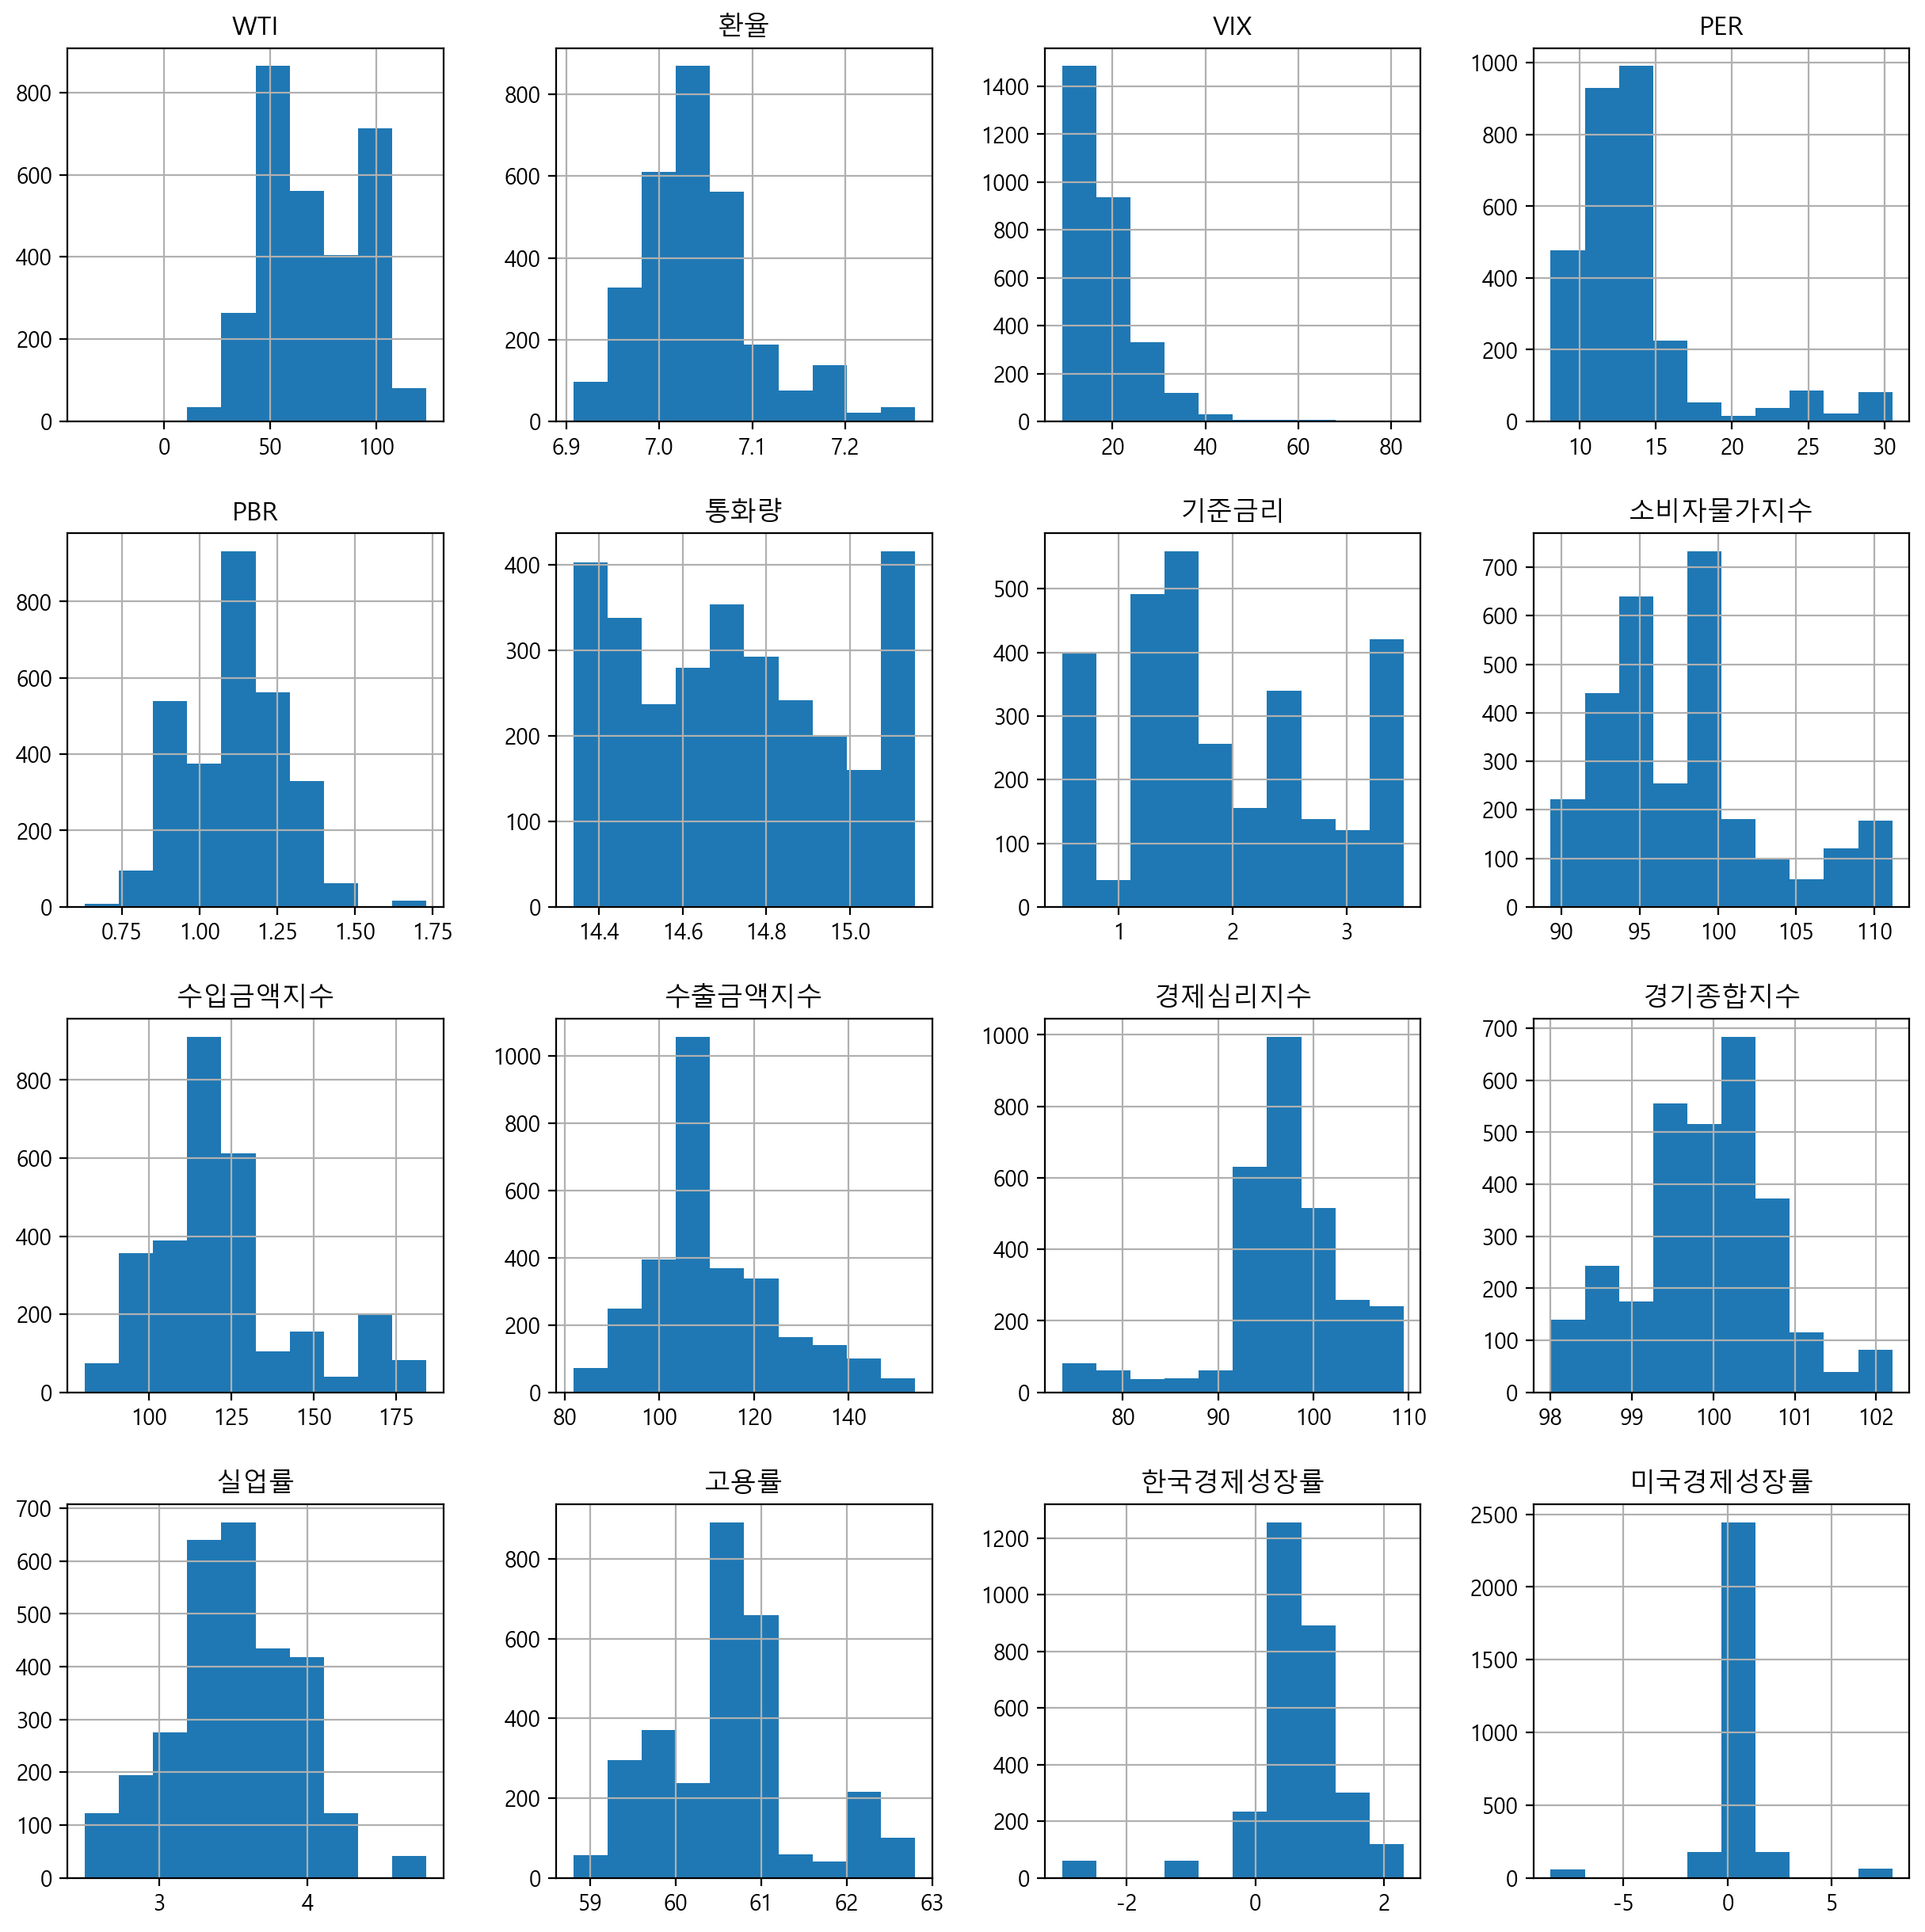

In [13]:
df.hist(figsize=(15,15))

## Test-Train-Split

In [14]:
encoder = LabelEncoder()
df['레이블']= encoder.fit_transform(df['레이블'])
df['레이블'].value_counts()

레이블
0    1357
2     847
1     719
Name: count, dtype: int64

In [15]:
X = df.drop('레이블',axis=1)
y = df[['레이블']]

In [16]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 

In [17]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(y_train.value_counts())
print(y_test.value_counts())

2046
877
2046
877
레이블
0      950
2      593
1      503
Name: count, dtype: int64
레이블
0      407
2      254
1      216
Name: count, dtype: int64


In [18]:
# train_data = pd.concat([X_train,y_train], axis=1)
# test_data= pd.concat([X_test,y_test],axis=1 )

## 이상치

- Box Plot
    - train_data의 이상치 확인 (test_data는 과적합 방지 차원에서 건들지 않음)
    - 추가로 스케일링이 필요함을 확인할 수 있음

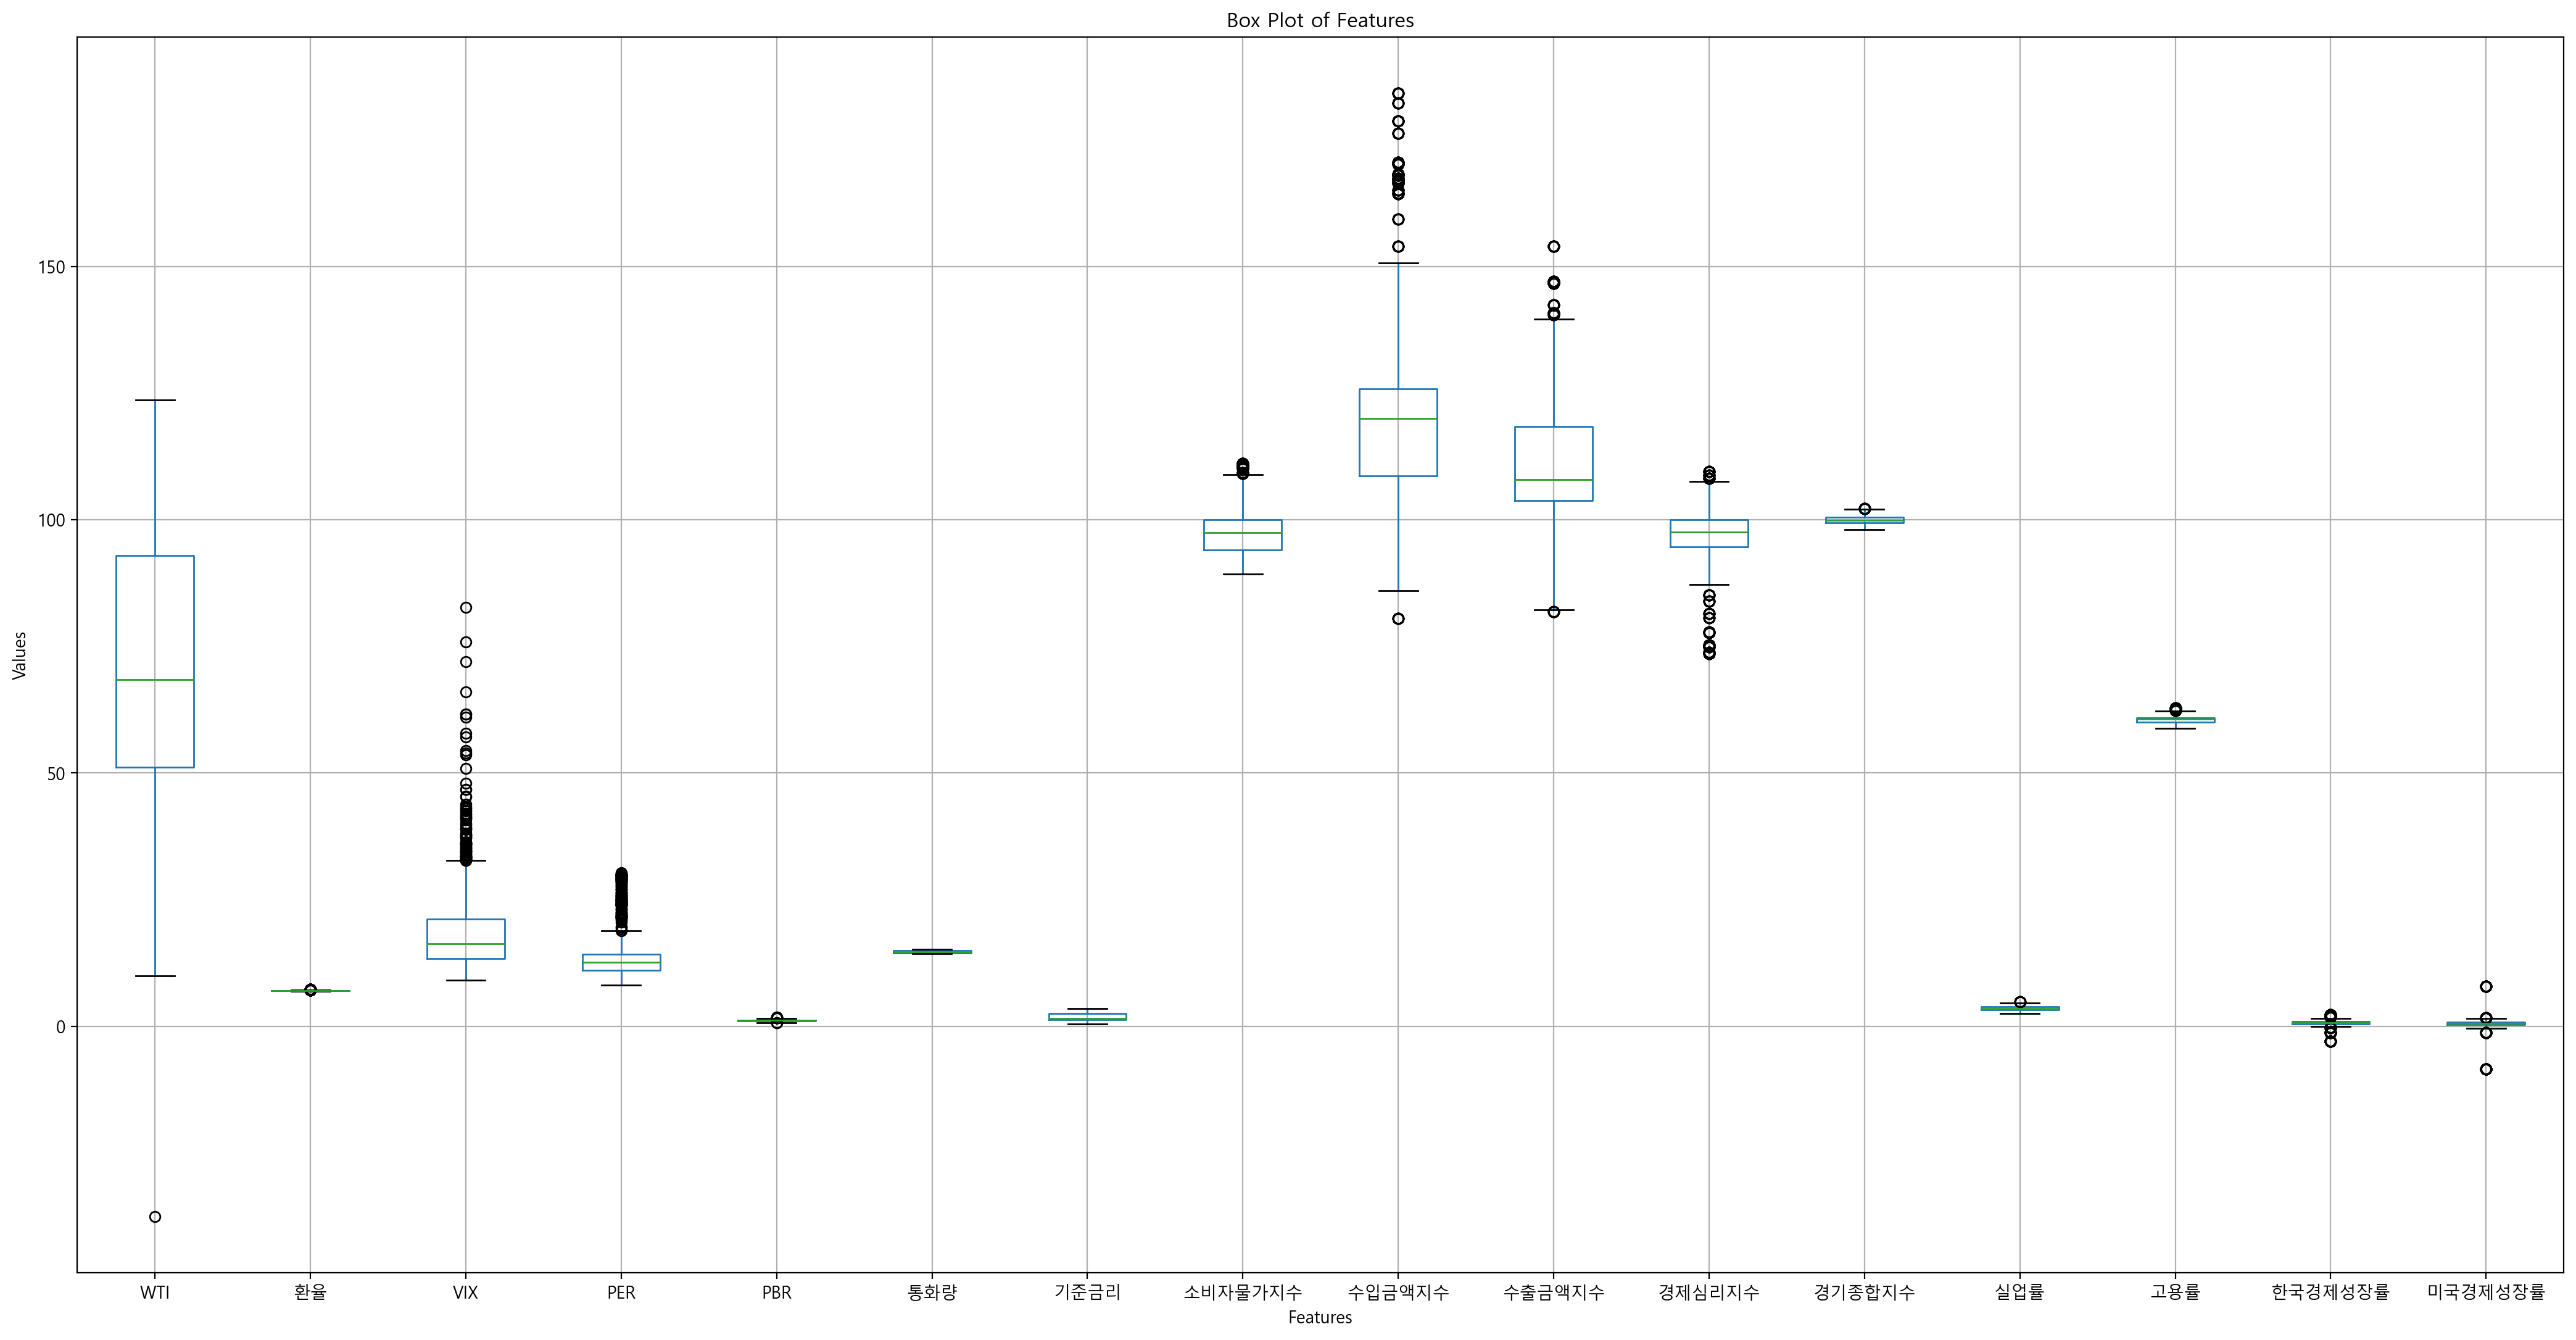

In [19]:
plt.figure(figsize=(26, 13))
X_train.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

이상치는 존재하지만, 후보 피처 모두 실제 경제 상황을 나타내는 피처들이기 때문에 제거하지 않음. (맞는 논리?)

--------------------

# 3. 스케일링
- 분류 모델에서 스케일링이 필수적인 단계는 아니지만 성능을 조금이라도 높일 가능성과, 컴퓨팅 리소스 낭비 방지 차원에서 실시

In [20]:
# X_train = train_data.drop('레이블', axis=1)
# y_train = train_data[['레이블']]

# X_test = test_data.drop('레이블', axis=1)
# y_test = test_data[['레이블']]

- 스케일링
    - 환율, PBR, 수입금액지수, 수출금액지수, 경제심리지수, 경기종합지수, 실업률, 고용률 : 정규성 o 
    -> 표준화 스케일링 적용
    - WTI, VIX, PER, 통화량, 기준금리, 소비자물가지수, 한국경제성장률, 미국경제성장률 : 정규성 x 
    -> 최소 최대 스케일링 적용

In [21]:
# 표준화 (StandardScaler)
features_to_standardize = ['WTI', 'VIX', 'PER', '통화량', '기준금리', '소비자물가지수', '한국경제성장률', '미국경제성장률']
scaler_standardize = StandardScaler()
X_train[features_to_standardize] = scaler_standardize.fit_transform(X_train[features_to_standardize])
X_test[features_to_standardize] = scaler_standardize.transform(X_test[features_to_standardize])

In [22]:
# 최소-최대 스케일링 (Min-Max Scaling)
features_to_minmax = ['환율', 'PBR', '수입금액지수', '수출금액지수', '경제심리지수', '경기종합지수', '실업률', '고용률']
scaler_minmax = MinMaxScaler()
X_train[features_to_minmax] = scaler_minmax.fit_transform(X_train[features_to_minmax])
X_test[features_to_minmax] = scaler_minmax.transform(X_test[features_to_minmax])

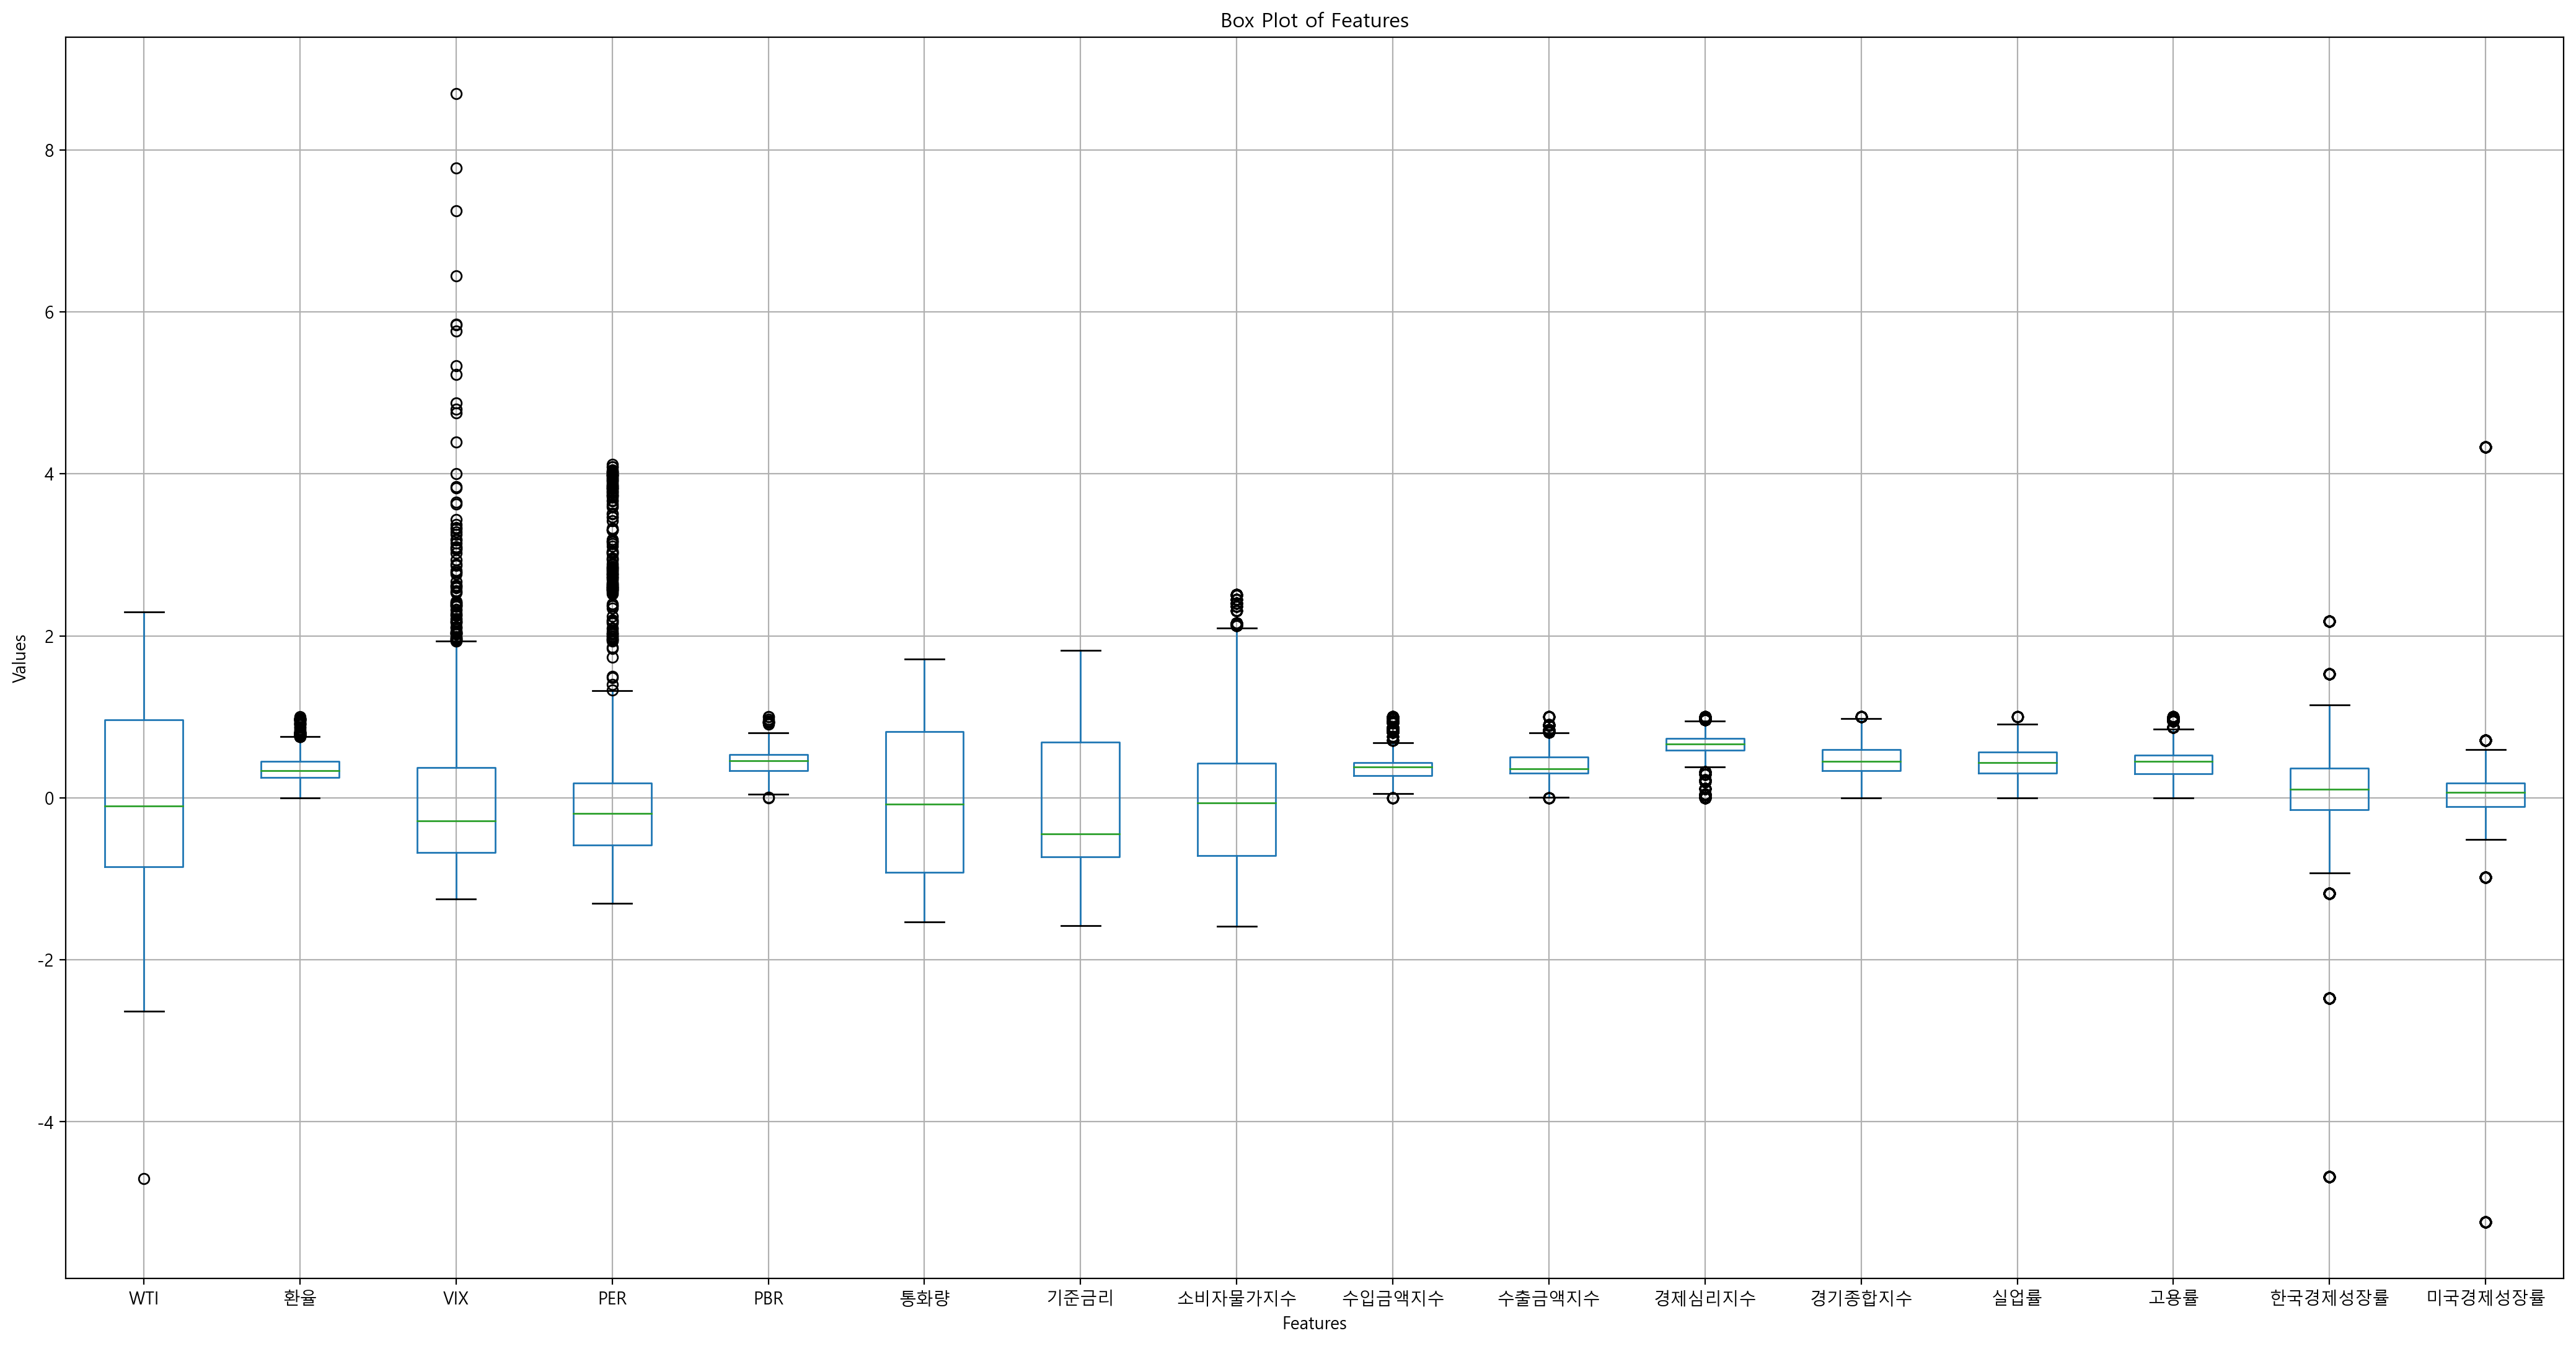

In [23]:
# 스케일링 결과 확인

plt.figure(figsize=(26, 13))
X_train.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

---------------

## 4. 피처 셀렉션

- 먼저 feature_importance로 중요한 피처 순서 확인 -> 일별 데이터의 중요도가 높은 것으로 보아 후보 피처 선정의 한계점이 나타남
- 모델 기반 피처 선정 이후 이 값과 비교하여 타당성 확인

In [24]:
# Feature_Importances

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

rfc.feature_importances_

ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sorted_feature_importance = ftr_importances.sort_values(ascending=False)
data = sorted_feature_importance
importance = pd.DataFrame(data, columns=['feature importances'])
importance

,feature importances
PER,0.127725
WTI,0.118063
PBR,0.116534
VIX,0.093964
환율,0.090151
경제심리지수,0.062006
수입금액지수,0.058597
통화량,0.056570
소비자물가지수,0.044851
경기종합지수,0.043661


## Feature 갯수 구하기 위한 Logit

### 질문 : logit.fit할 때 logit.fit(X, y) or logit.fit(X_train, y_train) 무엇이 맞나요?

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()


logit = SelectFromModel(LogisticRegression())
logit.fit(X, y)
logit_support = logit.get_support()
lr_feature = X.loc[:,logit_support].columns.tolist()

In [26]:
print(lr_feature)
print(len(lr_feature))

['VIX', '기준금리', '소비자물가지수', '경제심리지수', '경기종합지수', '한국경제성장률']
6


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()


logit = SelectFromModel(LogisticRegression())
logit.fit(X_train, y_train)
logit_support = logit.get_support()
lr_feature = X_train.loc[:,logit_support].columns.tolist()

In [28]:
print(lr_feature)
print(len(lr_feature))

['환율', 'PBR', '통화량', '소비자물가지수', '수입금액지수', '경제심리지수', '고용률']
7


## 피처 선정

- Filter 방법은 분류 모델 특성 상 통계 기법의 중요도가 떨어지므로 생략

1. 전진선택법 by Wrapper
2. 후진선택법 by Wrapper
3. Stepwise선택법 by Wrapper
4. Lasso by embedded
5. Ridge by embedded
6. ElasticNet by embedded

In [29]:
# 1. 전진선택법 by Wrapper

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

selected_features = []
best_score = 0

while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features

Selected feature: WTI, Accuracy: 0.5610
Selected feature: VIX, Accuracy: 0.5701
Selected feature: 기준금리, Accuracy: 0.5747
Selected feature: PER, Accuracy: 0.5838
Selected feature: 미국경제성장률, Accuracy: 0.5861

Forward selected features:


In [30]:
# 2. 후진선택법 by Wrapper

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features

Removed feature: 환율, Accuracy: 0.5804

Final selected features:


In [31]:
# 3. Stepwise선택법 by Wrapper

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

selected_features = []
best_score = 0

# Forward step
while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_val[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_val)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

# Backward step
while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_val[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_val)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Stepwise = selected_features

Selected feature: WTI, Accuracy: 0.5610
Selected feature: VIX, Accuracy: 0.5701
Selected feature: 기준금리, Accuracy: 0.5747
Selected feature: PER, Accuracy: 0.5838
Selected feature: 미국경제성장률, Accuracy: 0.5861

Final selected features:


In [32]:
# 4. Lasso

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.6261


In [33]:
lasso_best = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
0,WTI,0.019055
1,환율,-1.551494
2,VIX,-0.045550
3,PER,-0.371592
4,PBR,15.937626
5,통화량,0.674338
6,기준금리,-1.309191
7,소비자물가지수,0.087033
8,수입금액지수,-0.005243
9,수출금액지수,0.028123


In [34]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 16 개


['WTI',
 '환율',
 'VIX',
 'PER',
 'PBR',
 '통화량',
 '기준금리',
 '소비자물가지수',
 '수입금액지수',
 '수출금액지수',
 '경제심리지수',
 '경기종합지수',
 '실업률',
 '고용률',
 '한국경제성장률',
 '미국경제성장률']

In [35]:
# 5. Ridge

ridge_model = LogisticRegression()
param_grid = {'penalty' : ['l2'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(ridge_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.6212


In [36]:
ridge_best = LogisticRegression(C=10, penalty='l2', solver='liblinear').fit(X_train, y_train)

df_ridge = pd.DataFrame()
df_ridge['feature'] = X_train.columns
df_ridge['coef'] = ridge_best.coef_[0]
df_ridge.drop(df_ridge[df_ridge['coef']==0].index, inplace=True)
df_ridge

,feature,coef
0,WTI,0.015238
1,환율,-3.359937
2,VIX,-0.027506
3,PER,-0.373907
4,PBR,18.601222
5,통화량,3.036336
6,기준금리,-1.384125
7,소비자물가지수,-0.064956
8,수입금액지수,0.000515
9,수출금액지수,0.028843


In [37]:
# 릿지에서 선택된 피처
ridge = df_ridge['feature'].values.tolist()
print('Ridge에서 선택된 피처 수 {0:1.0f}'.format(len(df_ridge)), '개')
ridge

Ridge에서 선택된 피처 수 16 개


['WTI',
 '환율',
 'VIX',
 'PER',
 'PBR',
 '통화량',
 '기준금리',
 '소비자물가지수',
 '수입금액지수',
 '수출금액지수',
 '경제심리지수',
 '경기종합지수',
 '실업률',
 '고용률',
 '한국경제성장률',
 '미국경제성장률']

## 최종 피처 선정

In [38]:
list_Forward = list(Forward)
list_Backward = list(Backward)
list_Stepwise = list(Stepwise)
list_lasso = list(lasso)
list_ridge = list(ridge)
list_col_all = X_train.columns

In [39]:
def func_Forward(x):
    if x in list_Forward:
        return 1
    else:
        return 0
    
def func_Backward(x):
    if x in list_Backward:
        return 1
    else:
        return 0


def func_Stepwise(x):
    if x in list_Stepwise:
        return 1
    else:
        return 0
    
def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0
    
def func_ridge(x):
    if x in list_ridge:
        return 1
    else:
        return 0

In [40]:
# 2번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['ridge'] = list_col_all.map(func_ridge)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]+feature_counts["ridge"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 16


,Feature,Forward,Backward,Stepwise,lasso,ridge,total
0,WTI,1,1,1,1,1,5
1,환율,0,0,0,1,1,2
2,VIX,1,1,1,1,1,5
3,PER,1,1,1,1,1,5
4,PBR,0,1,0,1,1,3
5,통화량,0,1,0,1,1,3
6,기준금리,1,1,1,1,1,5
7,소비자물가지수,0,1,0,1,1,3
8,수입금액지수,0,1,0,1,1,3
9,수출금액지수,0,1,0,1,1,3


In [41]:
# 3번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['ridge'] = list_col_all.map(func_ridge)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]+feature_counts["ridge"]
feature_final = feature_counts[feature_counts["total"]>=3]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 15


,Feature,Forward,Backward,Stepwise,lasso,ridge,total
0,WTI,1,1,1,1,1,5
2,VIX,1,1,1,1,1,5
3,PER,1,1,1,1,1,5
4,PBR,0,1,0,1,1,3
5,통화량,0,1,0,1,1,3
6,기준금리,1,1,1,1,1,5
7,소비자물가지수,0,1,0,1,1,3
8,수입금액지수,0,1,0,1,1,3
9,수출금액지수,0,1,0,1,1,3
10,경제심리지수,0,1,0,1,1,3


In [42]:
# 4번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['ridge'] = list_col_all.map(func_ridge)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]+feature_counts["ridge"]
feature_final = feature_counts[feature_counts["total"]>=4]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 5


,Feature,Forward,Backward,Stepwise,lasso,ridge,total
0,WTI,1,1,1,1,1,5
2,VIX,1,1,1,1,1,5
3,PER,1,1,1,1,1,5
6,기준금리,1,1,1,1,1,5
15,미국경제성장률,1,1,1,1,1,5


In [43]:
# 5번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)
feature_counts['ridge'] = list_col_all.map(func_ridge)

feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]+feature_counts["ridge"]
feature_final = feature_counts[feature_counts["total"]>=5]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 5


,Feature,Forward,Backward,Stepwise,lasso,ridge,total
0,WTI,1,1,1,1,1,5
2,VIX,1,1,1,1,1,5
3,PER,1,1,1,1,1,5
6,기준금리,1,1,1,1,1,5
15,미국경제성장률,1,1,1,1,1,5


In [44]:
final_ftr = feature_final['Feature'].values

----------------------------------------

## 5. 다중공선성 확인 (생략 가능 단계)

- 분류 모델 특성 상 독립변수 간의 상관관계가 중요하지 않지만, <br> 이후 로지스틱회귀, SVM 모델도 사용할 것을 감안하여 다중공선성 확인

In [55]:
X_train = X_train[final_ftr]
X_test = X_test[final_ftr]

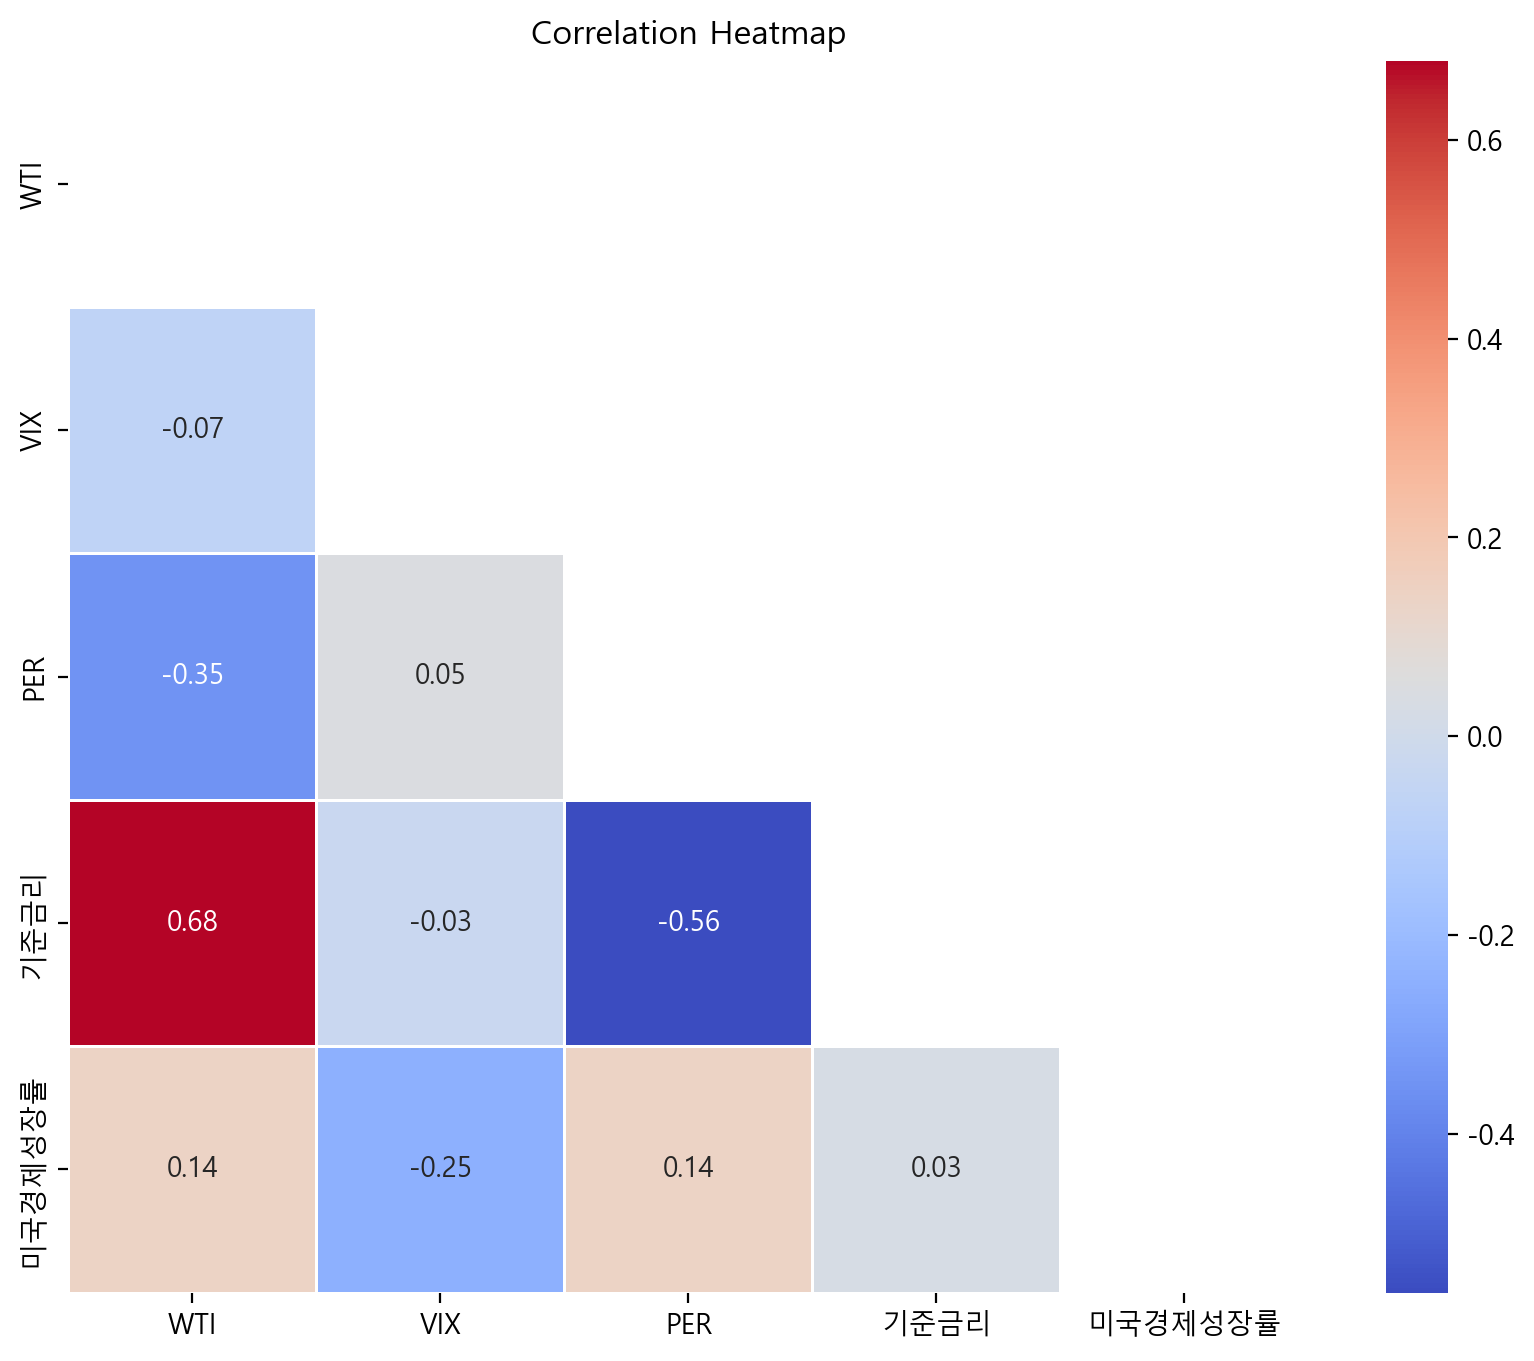

In [46]:
# 상관관계 행렬을 구합니다.
corr = X_train.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그립니다.
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                     for i in range(X_train.shape[1])]
vif['Feature'] = X_train.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
0,17.746736,WTI
3,11.537764,기준금리
2,7.254340,PER
1,6.926014,VIX
4,1.222630,미국경제성장률


-----------------------

## 6. 모델링

In [57]:
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    for clf in models:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred), 2),
                    round(precision_score(y_test, pred, average='weighted'), 2),
                    round(recall_score(y_test, pred, average='weighted'), 2),
                    round(f1_score(y_test, pred, average='weighted'), 2))
        rdict['model'].append(clf.__class__.__name__)
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

    rdf = pd.DataFrame(data=rdict)
    return rdf

In [58]:
model_basic(X_train, y_train, X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 2046, number of used features: 5
[LightGBM] [Info] Start training from score -0.767180
[LightGBM] [Info] Start training from score -1.403052
[LightGBM] [Info] Start training from score -1.238448


,model,accuracy,precision,recall,f1_score
0,LogisticRegression,0.48,0.36,0.48,0.35
1,DecisionTreeClassifier,0.45,0.27,0.45,0.32
2,SVC,0.25,0.06,0.25,0.10
3,RandomForestClassifier,0.28,0.27,0.28,0.18
4,XGBClassifier,0.29,0.08,0.29,0.13
5,LGBMClassifier,0.29,0.08,0.29,0.13


--------------

## 7. 교차 검증 & 하이퍼 파라미터 조정

------------------------

## 8. 투자 전략 구현 및 백테스팅

----------------